In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [2]:
file = pd.read_csv('datatraining.txt',sep=',')
file

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


In [3]:
#2 Удалить дубликаты строк
pd.options.mode.chained_assignment = None

print("Размер данных до удаления")
shapes = file.shape
print("Количество строк: " + str(shapes[0]))

file.drop_duplicates(inplace=True)
print("\n")

print("Размер данных после удаления")
shapes = file.shape
print("Количество строк: " + str(shapes[0]))

Размер данных до удаления
Количество строк: 8143


Размер данных после удаления
Количество строк: 8143


<BarContainer object of 2 artists>

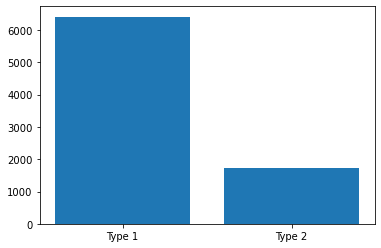

In [4]:
#3 Оценить сбалансированность
groups_names = ["Type 1", "Type 2"]
Type1 = file[file["Occupancy"] == 0].value_counts().sum()
Type2 = file[file["Occupancy"] == 1].value_counts().sum()
plt.bar(groups_names,[Type1,Type2])

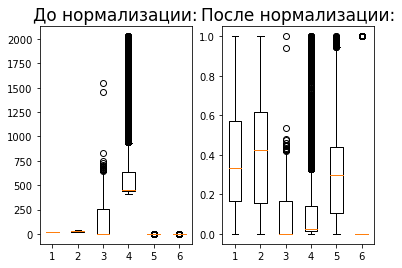

In [9]:
#4 Масштабирование
file = pd.read_csv('datatraining.txt',sep=',')
file.drop(file.columns[[0]], axis = 1, inplace = True)
plt.subplot(1, 2, 1);
plt.title('До нормализации:', fontsize=17)
plt.boxplot(file);

file = (file - file.min())/(file.max() - file.min());

plt.subplot(1, 2, 2);
plt.title('После нормализации:', fontsize=17)
plt.boxplot(file);

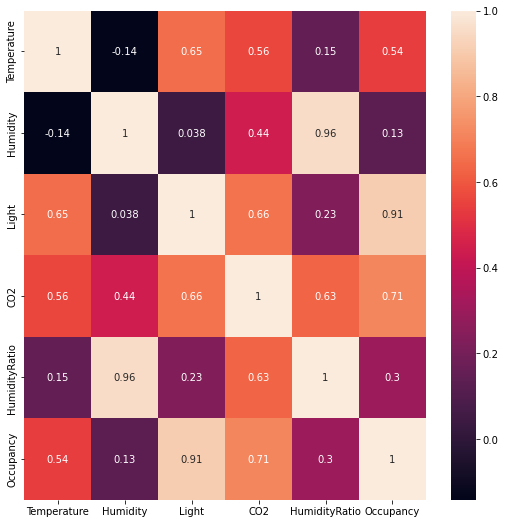

In [10]:
#6 Оценить кореляцию
file = pd.read_csv('datatraining.txt',sep=',')
plt.figure(figsize=(9, 9));

corr = file.corr();

sb.heatmap(corr, annot=True);

In [12]:
#8 Метод K ближайших соседей
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

file.drop(file.columns[[0]], axis = 1, inplace = True)
x = file.drop('Occupancy', axis=1)
y = file['Occupancy']

n_classes = 2 #Получаем количество классов

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) #Делим данные на обучаущие и тестовые
  
classificator = KNeighborsClassifier() #Указываем классификатор(К ближайших соседей)
parametrs = {'n_neighbors': range(3,30,1)}; #Задаем количество соседей в виде range для подбора лучшего через поиск по сетке

grid = GridSearchCV(classificator, parametrs, cv=10)#Задаем количество блоков для перекрестной проверки и параметры для поиска по сетке
grid.fit(x_train, y_train)#Обучаем алгоритм
grid.best_params_#Выводим лучшие параметры


{'n_neighbors': 5}

In [13]:
grid.predict(x_test) #Делаем прогноз на тестовых данных и выводим результат

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

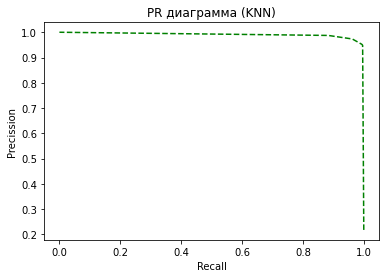

In [15]:
#PR
from sklearn.metrics import precision_recall_curve

y_score = grid.predict_proba(x_test) #Делаем прогноз в виде вероятностей

precision, recall, _ = precision_recall_curve(y_test, y_score[:,1]) #Для каждого класса рассчитываем precission и recall

plt.plot(recall, precision, linestyle='--',color='green') #Выводим график

plt.title('PR диаграмма (KNN)')
plt.xlabel('Recall')
plt.ylabel('Precission')
plt.show()

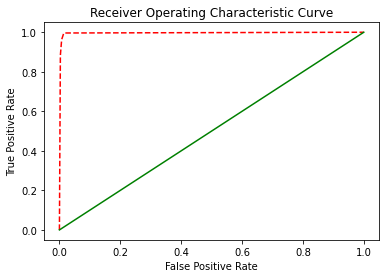

In [16]:
#ROC
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_score[:,1]) #Для каждого класса рассчитываем False-Positive rate и True-Positive rate


plt.plot(fpr, tpr, linestyle='--', color='red')#Выводим график 

plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()

In [18]:
#9 логический классификатор (бинарное решающее дерево).
from sklearn import tree
classificator = tree.DecisionTreeClassifier() #Указываем классификатор
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(3,30,1)}; #Указываем параметры для подбора лучшего через поиск по сетке
#criterium критерий ветвления
#Оценивает важность функции. Основываясь на нём, модель определит важностьдля каждого признака классификации
#Максимальная глубина дерева
grid = GridSearchCV(classificator, parametrs, cv=10)#Задаем количество блоков для перекрестной проверки и параметры для поиска по сетке
grid.fit(x_train, y_train)#Обучаем алгоритм
grid.best_params_#Выводим лучшие параметры

{'criterion': 'gini', 'max_depth': 19}

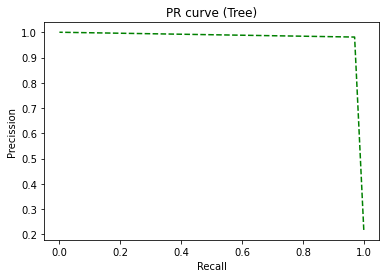

In [19]:
#PR
from sklearn.metrics import precision_recall_curve

y_score = grid.predict_proba(x_test) #Делаем прогноз в виде вероятностей

precision, recall, _ = precision_recall_curve(y_test, y_score[:,1]) #Для каждого класса рассчитываем precission и recall

plt.plot(recall, precision, linestyle='--',color='green', label='0 Type') #Выводим график класса 1

plt.title('PR curve (Tree)')
plt.xlabel('Recall')
plt.ylabel('Precission')
plt.show()

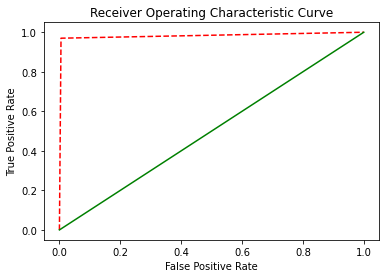

In [21]:
#ROC
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_score[:,1]) #Для каждого класса рассчитываем False-Positive rate и True-Positive rate


plt.plot(fpr, tpr, linestyle='--',color='red')
    
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()